<a href="https://colab.research.google.com/github/quangvan99/guide/blob/khoa/PyTorch_Computer_Vision/PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [3]:
#Training data có sẵn
train_data = datasets.FashionMNIST(
    root = "data", # Folder mình muốn lưu data tải về
    train= True, # Lấy data train hay là split thành test
    download = True,  # Tải nếu nó chưa tải
    transform = ToTensor(), # Hình ảnh được tải về dưới dạng PIL(Python Imaging Library), ta cần chuyển nó thành torch Tensor
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train= False, # Test data
    download = True,
    transform = ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.6MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 308kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.53MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 13.1MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
image, label = train_data[0]

In [5]:
print(image.shape)
# Color_channel = 1 nghĩa là ảnh đen trắng không màu (grayscale)
print(f"color_channels = {image.shape[0]}, height = {image.shape[1]}, width = {image.shape[2]}")
# Color_channel = 3 nghĩa là có 3 màu red, green và blue (màu RGB)

torch.Size([1, 28, 28])
color_channels = 1, height = 28, width = 28


In [6]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

image shape: torch.Size([1, 28, 28]), label: 9


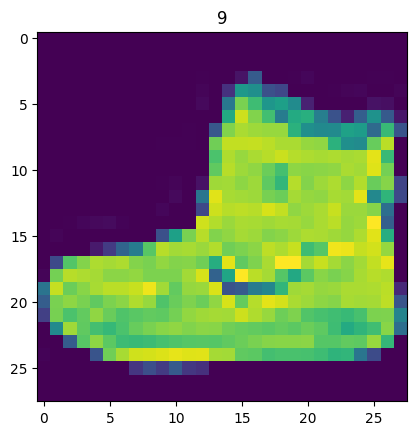

In [8]:
# Show img
image, label = train_data[0] # Thư viện plt sẽ in ra màn hình với cmap mặc định là viridis, nếu muốn in ra ảnh đen trắng thì cần chỉnh lại
print(f"image shape: {image.shape}, label: {label}")
plt.imshow(image.squeeze())
plt.title(label);

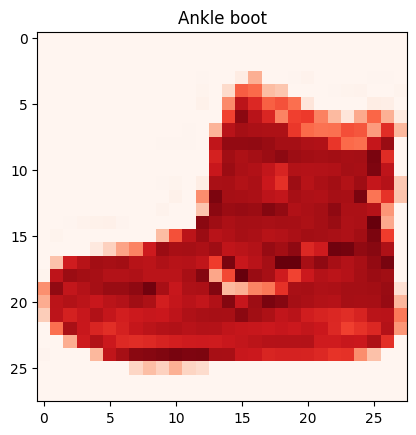

In [9]:
# Chuyển về đen trắng
plt.imshow(image.squeeze(), cmap="Reds") # gray để về đen trắng, để Reds vì thích
plt.title(class_names[label]);

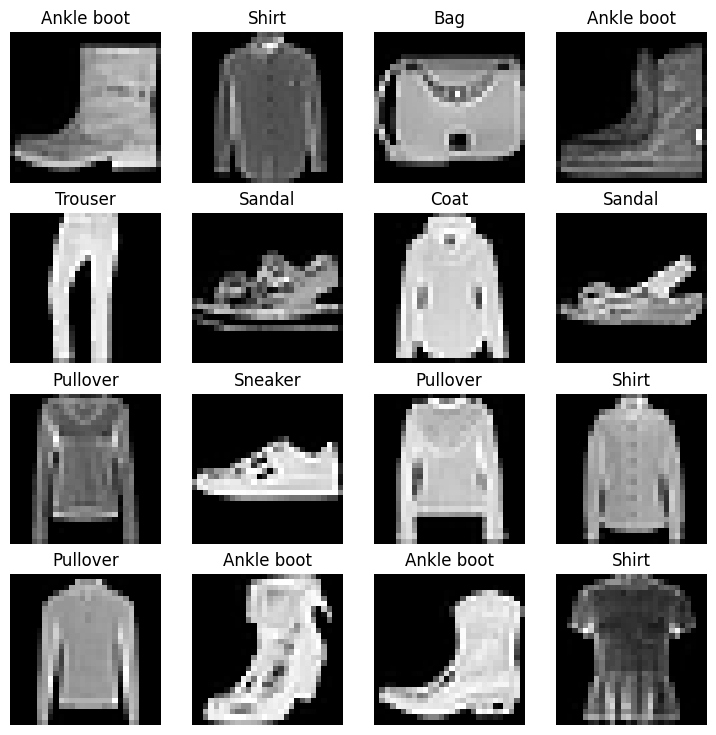

In [10]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4,4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap ="grey")
    plt.title(class_names[label])
    plt.axis(False); # Ẩn các trục tọa độ


### **6. Data Loader**
-  Dùng để quản lý và tương tác với dữ liệu
- Các tính năng:
	1. Batching: Chia nhỏ dữ liệu ban đầu thành từng batch nhỏ để xử lí, giúp tăng tốc độ tính toán
	2. Shuffling: Xáo trộn dữ liệu trước mỗi vòng epoch để tránh sự phụ thuộc vào thứ tự dl
	3. Custom Collation: Định nghĩa lại cách gộp dữ liệu trong 1 batch bằng hàm `collate_fn`
- Ví dụ: `dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)`

In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# Chuyển data thành các dữ liệu lặp (batches)
train_dataloader = DataLoader(
    train_data,
    batch_size = BATCH_SIZE,
    shuffle = True # Xáo trộn data mỗi epoch
)

test_dataloader = DataLoader(
    test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Độ dài của train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Độ dài của test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x79f341677fa0>, <torch.utils.data.dataloader.DataLoader object at 0x79f341675990>)
Độ dài của train dataloader: 1875 batches of 32
Độ dài của test dataloader: 313 batches of 32


In [12]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


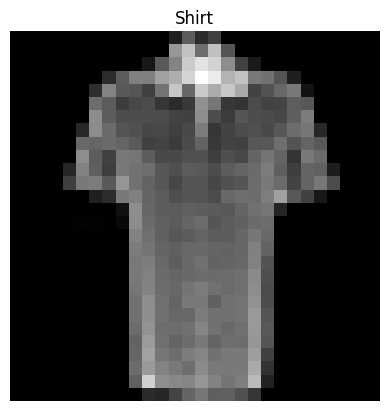

In [13]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# Flatten
- Flatten là một lớp trong mạng neutral, có tác dụng biến ảnh nhiều chiều thành một vector torch Tenso duy nhất, thường dùng để chuyển đổi dữ liệu từ tầng CNN (convolutional) sang các tầng fully connected (dense).

- Cách hoạt động: giả sử đầu vào có dạng (batch_size,...,...) nó sẽ làm phẳng mọi chiều ngoại trừ batch_size


[Docs](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)



In [14]:
# Ví dụ

x = torch.rand(4,1,28,28) # batch_size = 4, 3 kênh màu, size 28x28


flatten = nn.Flatten()
# Có thể cho start_dim = vào trong nn.Flatten() để điều chỉnh số chiều
x_flat = flatten(x)


print(f"Size đầu vào: {x.shape}")
print(f"Size đầu ra: {x_flat.shape}") # 1 x 28 x 28 = 2352

Size đầu vào: torch.Size([4, 1, 28, 28])
Size đầu ra: torch.Size([4, 784])


Cách máy tính nhận diện và xử lí hình ảnh:
  - Mỗi hình ảnh sẽ được chia ra làm các pixel nhỏ, phụ thuộc vào độ đậm nhạt của các ô màu để xác định trọng số weight
  - Đập dẹt, cán mỏng hình ảnh thành một đường vector duy nhất bằng hàm Flatten

[Video minh họa](https://www.youtube.com/watch?v=aircAruvnKk)

# Lớp Model_v0

In [15]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.LeakyReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.LeakyReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
      return self.layer_stack(x)

In [16]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784, # (28x28)
    hidden_units=64,
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=64, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [17]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [18]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)
def accuracy_fn(y_true, y_pred): # Hàm tính độ chính xác
  correct = torch.eq(y_true, y_pred).sum().item() # lần lượt so sánh 2 giá trị với nhau, sum() đếm số lần True, item() trả về kiểu int
  acc = (correct / len(y_pred)) * 100
  return acc

In [19]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epoch = 3

for epoch in tqdm(range(epoch)):
    print(f"Epoch: {epoch}\n---------")
    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        y_pred = model_0(X)

        loss = loss_fn(y_pred,y)
        train_loss += loss # Tổng mất mát

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Đã xử lí {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)

    #Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
      for X,y in test_dataloader:
        test_pred = model_0(X)

        test_loss += loss_fn(test_pred, y)

        test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

      test_loss /= len(test_dataloader)

      test_acc /= len(test_dataloader)

    print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device="cpu")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Đã xử lí 0/60000 samples
Đã xử lí 12800/60000 samples
Đã xử lí 25600/60000 samples
Đã xử lí 38400/60000 samples
Đã xử lí 51200/60000 samples
Train loss: 2.20976 | Test loss: 2.05639, Test acc: 43.11
Epoch: 1
---------
Đã xử lí 0/60000 samples
Đã xử lí 12800/60000 samples
Đã xử lí 25600/60000 samples
Đã xử lí 38400/60000 samples
Đã xử lí 51200/60000 samples
Train loss: 1.74725 | Test loss: 1.44481, Test acc: 61.17
Epoch: 2
---------
Đã xử lí 0/60000 samples
Đã xử lí 12800/60000 samples
Đã xử lí 25600/60000 samples
Đã xử lí 38400/60000 samples
Đã xử lí 51200/60000 samples
Train loss: 1.25225 | Test loss: 1.11473, Test acc: 63.17
Train time on cpu: 42.926 seconds


In [20]:
# Hàm eval
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = "cuda" if torch.cuda.is_available() else "cpu"): #add khi 2 device

    model.to(device) #add khi 2 device
    loss, acc = 0, 0 # Tổng số loss và acc
    model.eval() # Tắt dropout, batch normalization
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device) #add khi 2 device

            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1)) # (logits -> pred_prob -> pred_labels)

        # loss/acc
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


model_0_results = eval_model(model=model_0, data_loader=test_dataloader,loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 1.1147282123565674,
 'model_acc': 63.16892971246006}

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device # Ra cuda thì tính tiếp

'cpu'

# Tạo model có lớp tuyến tính và vô tuyến tính

In [22]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [23]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # 28 x 28
                              hidden_units=50,
                              output_shape=len(class_names)
                              ).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [24]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [25]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [26]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [27]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1)) # vector xác suất (logits) -> pred labels


        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [28]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
                model=model_1,
                loss_fn=loss_fn,
                optimizer=optimizer,
                accuracy_fn=accuracy_fn)


    test_step(data_loader=test_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.42013 | Train accuracy: 54.41%
Test loss: 0.93442 | Test accuracy: 70.73%

Epoch: 1
---------
Train loss: 0.81623 | Train accuracy: 73.18%
Test loss: 0.77930 | Test accuracy: 73.15%

Epoch: 2
---------
Train loss: 0.73145 | Train accuracy: 74.75%
Test loss: 0.73675 | Test accuracy: 74.10%

Train time on cpu: 39.505 seconds


In [29]:
# Get model_1 results
model_1_results = eval_model(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.7367474436759949,
 'model_acc': 74.10143769968052}

# Mạng nơ-ron tích chập (Convolutional Neural Network - CNN)

CNN bao gồm ba thành phần chính:

- Lớp tích chập (Convolutional Layer):Là thành phần cốt lõi của CNN, thực hiện phép tích chập (convolution) giữa ảnh đầu vào và một bộ lọc (filter/kernel).
Bộ lọc là một ma trận nhỏ, trượt qua ảnh đầu vào để trích xuất các đặc trưng (features) như cạnh, góc, hoặc kết cấu.
Mỗi bộ lọc sẽ học một đặc trưng cụ thể, và nhiều bộ lọc có thể được sử dụng để học các đặc trưng khác nhau.

- Lớp gộp (Pooling Layer):Giảm kích thước không gian của các đặc trưng được trích xuất từ lớp tích chập.
Phổ biến nhất là gộp cực đại (Max Pooling), chọn giá trị lớn nhất trong mỗi vùng nhỏ của đặc trưng.
Gộp trung bình (Average Pooling) cũng có thể được dùng, tính giá trị trung bình của mỗi vùng.

- Lớp kết nối đầy đủ (Fully Connected Layer):Là lớp cuối cùng trong CNN, có nhiệm vụ phân loại hoặc đưa ra dự đoán.
Tất cả các neuron trong lớp này được kết nối đầy đủ với nhau.



Cách hoạt động:
- Dữ liệu đầu vào được đưa qua lớp tích chập để trích xuất các đặc trưng cục bộ.
- Sau đó, lớp gộp giảm độ phức tạp và kích thước của các đặc trưng, giúp giảm thiểu số lượng tham số.
- Cuối cùng, lớp kết nối đầy đủ xử lý và ánh xạ các đặc trưng đã giảm xuống thành đầu ra (như một nhãn phân loại hoặc giá trị dự đoán).


In [30]:
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            # Lớp tích chập 2D
            nn.Conv2d(in_channels=input_shape, # Số color_channel đầu vào
                      out_channels=hidden_units, # Số filter(kênh) trong lớp convolution
                      kernel_size=3, # Kích thước filter (n*n)
                      stride=1, # Khoảng cách mỗi lần dịch chuyển (pixel)
                      padding=1), # Thêm pixel xung quanh viền tránh tràn
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2) # Lớp giảm kích thước với kernel 2 x 2
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [31]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
images = torch.rand(size=(1, 3, 64, 64)) # batch_size, color_channels, height, width
conv_layer(images[0])

tensor([[[ 0.2627,  0.2357,  0.5061,  ...,  0.6885,  0.3737,  0.4963],
         [ 0.1674,  0.6528,  0.3261,  ...,  0.2350,  0.7167,  0.5342],
         [ 0.6406,  0.3667,  0.4903,  ...,  0.6244,  0.4835,  0.6650],
         ...,
         [ 0.5827,  0.3736,  0.3238,  ...,  0.2952,  0.4774,  0.6208],
         [ 0.5122,  0.4145,  0.5295,  ...,  0.5670,  0.3882,  0.5102],
         [ 0.3120,  0.2965,  0.4822,  ...,  0.2850,  0.4058,  0.2314]],

        [[-0.0891, -0.2282,  0.0935,  ...,  0.0270,  0.2015,  0.1897],
         [-0.0282, -0.0496, -0.0393,  ..., -0.1066,  0.0531, -0.0566],
         [-0.1813,  0.1403, -0.2824,  ...,  0.1208, -0.2488, -0.1403],
         ...,
         [-0.0909, -0.0310, -0.3443,  ..., -0.0857,  0.0637, -0.2087],
         [-0.0047, -0.2571,  0.2936,  ..., -0.5079, -0.2278, -0.2837],
         [-0.0080, -0.0823, -0.1483,  ..., -0.0197, -0.0599,  0.0822]],

        [[-0.1653,  0.2542,  0.0365,  ...,  0.0859, -0.1837, -0.0626],
         [ 0.0101,  0.3472, -0.0111,  ..., -0

In [32]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr = 0.1)

In [33]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_star_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
               model=model_2,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)

    test_step(data_loader=test_dataloader,
               model=model_2,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)


train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_star_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59518 | Train accuracy: 78.38%
Test loss: 0.39500 | Test accuracy: 85.99%

Epoch: 1
---------
Train loss: 0.36536 | Train accuracy: 86.90%
Test loss: 0.35244 | Test accuracy: 86.91%

Epoch: 2
---------
Train loss: 0.32588 | Train accuracy: 88.13%
Test loss: 0.32719 | Test accuracy: 88.07%

Train time on cpu: 188.225 seconds


In [34]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [35]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,1.114728,63.168930
1,FashionMNISTModelV1,0.736747,74.101438
2,FashionMNISTModelV2,0.327190,88.069089


In [36]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,1.114728,63.168930,42.926425
1,FashionMNISTModelV1,0.736747,74.101438,39.504843
2,FashionMNISTModelV2,0.327190,88.069089,188.225438


In [37]:
def make_pred(model: torch.nn.Module,
              data: list,
              device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim =0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [38]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)


print(f"Test sample shape: {test_samples[0].shape}")
print(f"Test label shape: {test_labels[0]}({class_names[test_labels[0]]})")

Test sample shape: torch.Size([1, 28, 28])
Test label shape: 5(Sandal)


In [39]:
pred_probs = make_pred(model=model_2,
                       data=test_samples)

pred_probs

tensor([[1.4021e-06, 1.7343e-07, 4.4511e-07, 1.2103e-05, 5.4026e-07, 9.9938e-01,
         3.7154e-06, 2.1650e-04, 1.4199e-04, 2.4416e-04],
        [1.0080e-01, 5.6287e-01, 7.4506e-04, 1.1212e-01, 6.3881e-02, 3.0674e-04,
         1.5560e-01, 1.6463e-03, 1.0169e-03, 1.0133e-03],
        [3.8239e-05, 1.2338e-06, 3.2391e-05, 6.0269e-05, 1.5860e-05, 1.9636e-03,
         7.6249e-06, 7.8097e-01, 1.9226e-03, 2.1498e-01],
        [7.8742e-04, 1.3270e-04, 1.6981e-01, 1.3967e-03, 8.2655e-01, 3.1661e-06,
         1.0841e-03, 1.2137e-05, 2.1172e-04, 1.7749e-05],
        [8.6987e-02, 5.9945e-05, 2.1540e-04, 8.9260e-01, 5.0072e-04, 4.4561e-07,
         1.9359e-02, 2.6450e-05, 2.3960e-04, 7.3933e-06],
        [8.5208e-01, 5.0843e-05, 1.6163e-03, 9.2852e-03, 7.7607e-03, 9.1815e-07,
         1.2845e-01, 2.6501e-06, 7.5505e-04, 6.0906e-07],
        [5.2980e-04, 3.9070e-05, 3.2348e-02, 2.5166e-05, 9.5285e-01, 5.1364e-06,
         1.3197e-02, 1.5579e-06, 9.7135e-04, 3.7291e-05],
        [6.0402e-06, 6.1119

In [40]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [41]:
print(f"Class dự đoán:   {pred_classes}")
print(f"Class thực tế:          {test_labels}")

Class dự đoán:   tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])
Class thực tế:          [5, 1, 7, 4, 3, 0, 4, 7, 1]


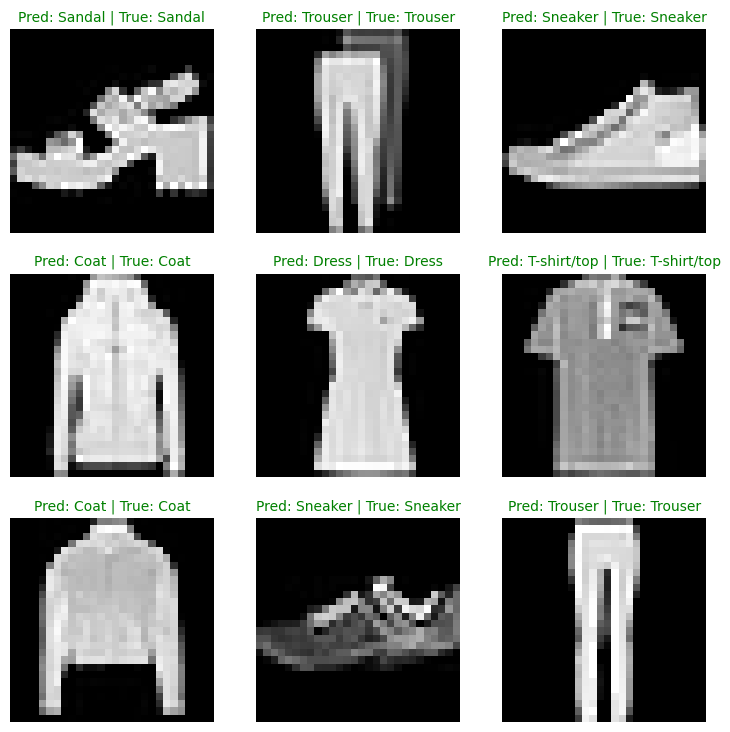

In [42]:
plt.figure(figsize=(9,9))
rows = 3
cols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(rows,cols,i+1)

  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  true_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | True: {true_label}"

  if pred_label == true_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

In [43]:
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)

    y_logit = model_2(X)

    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [44]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 11.1 MB/s eta 0:00:00
mlxtend version: 0.23.3


In [45]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

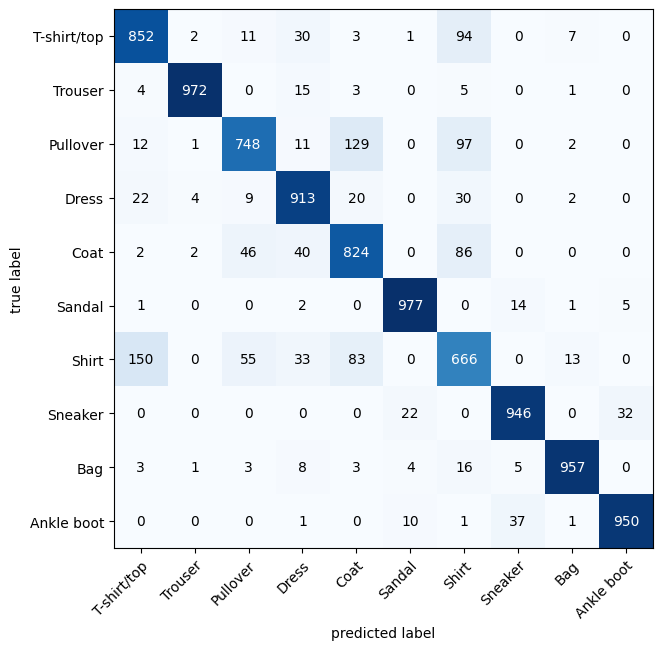

In [46]:
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)


fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
);

# Save & Load

In [47]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [48]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

<ipython-input-48-01e1a5266d0e>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


In [49]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [50]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [51]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)